# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="  + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
     
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    response = response.json()
    response
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | nuuk
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | amal
Processing Record 10 of Set 1 | mossel bay
Processing Record 11 of Set 1 | dimako
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | nadym
Processing Record 14 of Set 1 | joao pinheiro
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | edson
Processing Record 20 of Set 1 | pantai cenang
City not found. Skipping...
Processing Record 21 of Set 1 | colonia
Processing Record 22 of Set 1 | sterling
Processing R

Processing Record 42 of Set 4 | camocim
Processing Record 43 of Set 4 | janakpur
Processing Record 44 of Set 4 | kargil
Processing Record 45 of Set 4 | nadi
Processing Record 46 of Set 4 | gotse delchev
Processing Record 47 of Set 4 | lennox head
City not found. Skipping...
Processing Record 48 of Set 4 | kiunga
Processing Record 49 of Set 4 | bamboo flat
Processing Record 0 of Set 5 | labuan bajo
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | kapa'a
Processing Record 3 of Set 5 | rongelap
Processing Record 4 of Set 5 | fort bragg
Processing Record 5 of Set 5 | gorzow wielkopolski
Processing Record 6 of Set 5 | yichun
Processing Record 7 of Set 5 | balkashino
Processing Record 8 of Set 5 | tarawa
Processing Record 9 of Set 5 | bel ombre
Processing Record 10 of Set 5 | oualidia
City not found. Skipping...
Processing Record 11 of Set 5 | richmond
Processing Record 12 of Set 5 | buka
Processing Record 13 of Set 5 | hawaiian paradise park
Processing Record 14 of Set

City not found. Skipping...
Processing Record 33 of Set 8 | carnot
Processing Record 34 of Set 8 | narasapur
Processing Record 35 of Set 8 | nova sintra
Processing Record 36 of Set 8 | keminmaa
Processing Record 37 of Set 8 | vegreville
Processing Record 38 of Set 8 | howard springs
Processing Record 39 of Set 8 | ambovombe
Processing Record 40 of Set 8 | la gi
Processing Record 41 of Set 8 | fort st. john
Processing Record 42 of Set 8 | mar del plata
Processing Record 43 of Set 8 | flying fish cove
Processing Record 44 of Set 8 | la rinconada
Processing Record 45 of Set 8 | wailua homesteads
Processing Record 46 of Set 8 | marsabit
Processing Record 47 of Set 8 | kenai
Processing Record 48 of Set 8 | ruidoso
Processing Record 49 of Set 8 | rabo de peixe
Processing Record 0 of Set 9 | grand baie
Processing Record 1 of Set 9 | labuan
Processing Record 2 of Set 9 | callao
Processing Record 3 of Set 9 | severo-yeniseyskiy
Processing Record 4 of Set 9 | buulobarde
Processing Record 5 of Se

Processing Record 24 of Set 12 | hisua
Processing Record 25 of Set 12 | bengkulu
Processing Record 26 of Set 12 | donostia / san sebastian
City not found. Skipping...
Processing Record 27 of Set 12 | miyako
Processing Record 28 of Set 12 | san pablo villa de mitla
Processing Record 29 of Set 12 | murghob
Processing Record 30 of Set 12 | i-n-salah
Processing Record 31 of Set 12 | ambalangoda
Processing Record 32 of Set 12 | bac lieu
Processing Record 33 of Set 12 | arraial do cabo
Processing Record 34 of Set 12 | bata
Processing Record 35 of Set 12 | shimoda
Processing Record 36 of Set 12 | borba
Processing Record 37 of Set 12 | n'dalatando
Processing Record 38 of Set 12 | soio
Processing Record 39 of Set 12 | mongo
Processing Record 40 of Set 12 | sur
Processing Record 41 of Set 12 | fasa
Processing Record 42 of Set 12 | bikenibeu village
Processing Record 43 of Set 12 | guiuan
Processing Record 44 of Set 12 | sisimiut
Processing Record 45 of Set 12 | ocean shores
Processing Record 46 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.56,75,66,14.05,TF,1696307472
1,carnarvon,-24.8667,113.6333,23.64,34,0,7.93,AU,1696307473
2,longyearbyen,78.2186,15.6401,-3.09,59,75,9.26,SJ,1696307473
3,nuuk,64.1835,-51.7216,3.34,75,75,1.54,GL,1696307473
4,talnakh,69.4865,88.3972,1.23,97,100,6.53,RU,1696307473


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.56,75,66,14.05,TF,1696307472
1,carnarvon,-24.8667,113.6333,23.64,34,0,7.93,AU,1696307473
2,longyearbyen,78.2186,15.6401,-3.09,59,75,9.26,SJ,1696307473
3,nuuk,64.1835,-51.7216,3.34,75,75,1.54,GL,1696307473
4,talnakh,69.4865,88.3972,1.23,97,100,6.53,RU,1696307473


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

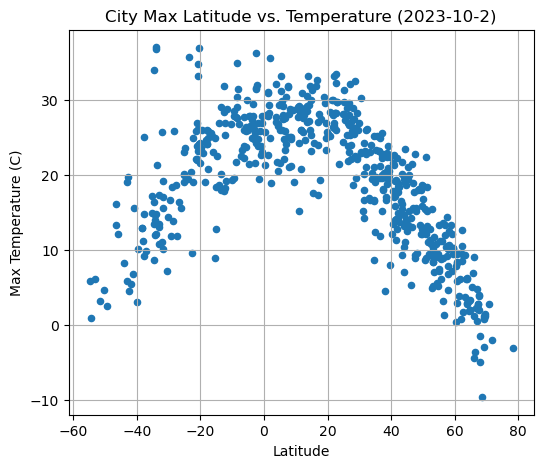

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid=True, figsize=(6,5),
              title="City Max Latitude vs. Temperature (2023-10-2)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

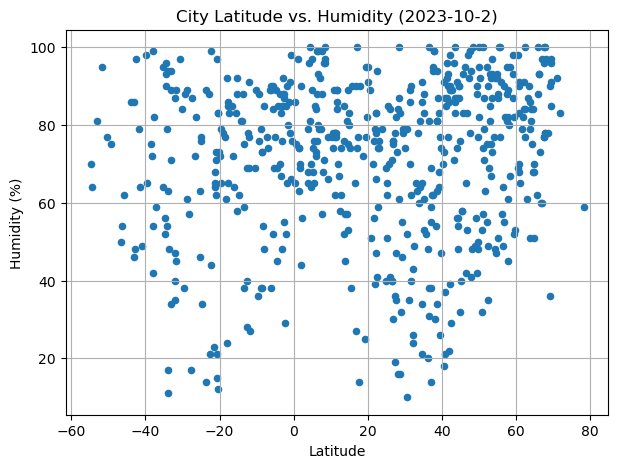

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind = "scatter", x = "Lat", y = "Humidity", grid=True, figsize=(7,5),
              title="City Latitude vs. Humidity (2023-10-2)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

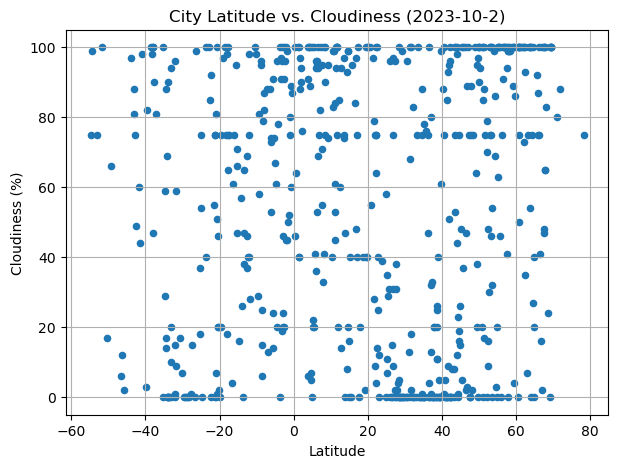

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", grid=True, figsize=(7,5),
              title="City Latitude vs. Cloudiness (2023-10-2)")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

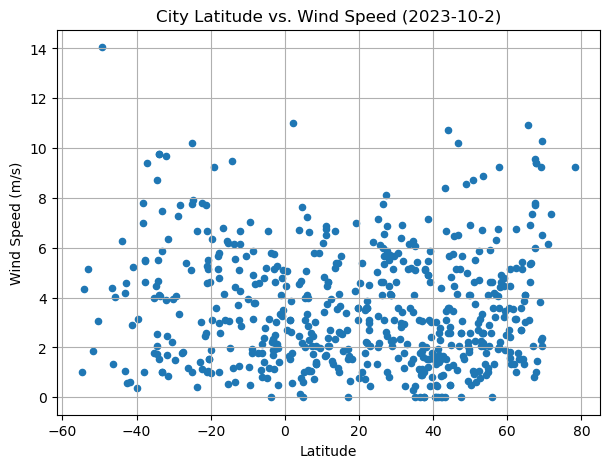

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", grid=True, figsize=(7,5),
              title="City Latitude vs. Wind Speed (2023-10-2)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress_plot(x, y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) 

    regress_values = x * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    
    plt.xlabel('Latitude')
        
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,-3.09,59,75,9.26,SJ,1696307473
3,nuuk,64.1835,-51.7216,3.34,75,75,1.54,GL,1696307473
4,talnakh,69.4865,88.3972,1.23,97,100,6.53,RU,1696307473
6,bethel,41.3712,-73.4140,15.92,87,0,0.00,US,1696307474
7,iqaluit,63.7506,-68.5145,2.85,86,100,3.60,CA,1696307474


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.56,75,66,14.05,TF,1696307472
1,carnarvon,-24.8667,113.6333,23.64,34,0,7.93,AU,1696307473
5,adamstown,-25.0660,-130.1015,20.09,76,54,10.20,PN,1696307265
9,mossel bay,-34.1831,22.1460,11.96,79,0,4.67,ZA,1696307474
11,grytviken,-54.2811,-36.5092,0.86,64,99,4.36,GS,1696307475


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8697014023119518


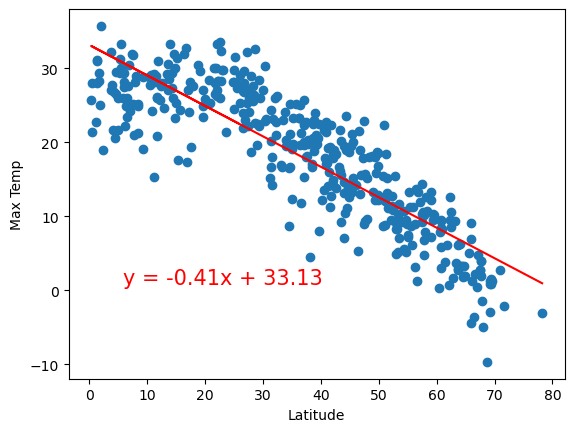

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

plt.ylabel("Max Temp")

linear_regress_plot(x, y)

The r-value is: 0.699428960075984


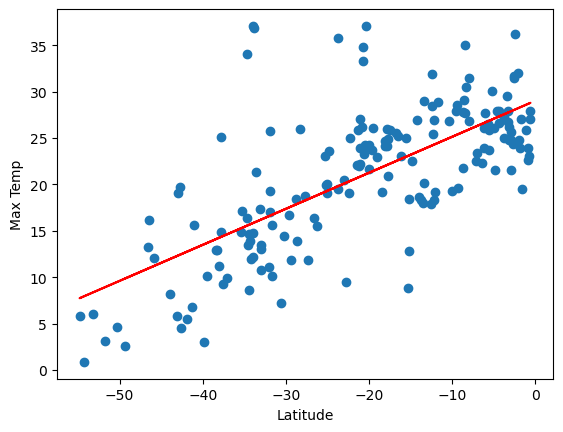

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

plt.ylabel("Max Temp")

linear_regress_plot(x, y)

**Discussion about the linear relationship:** In both the northern and southern hemispheres, the Pearson correlation coefficent is close to 1; This indicates a strong negative relationship in the northern hemisphere and a strong positive relationship in the southern hemisphere. 

In other words, there is a strong linear association between the latitude and wind speed in both hemispheres. In the north, the higher the latitude, the lower the maximum temperature; while in the south, the higher the latitude, the higher the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08271657439299454


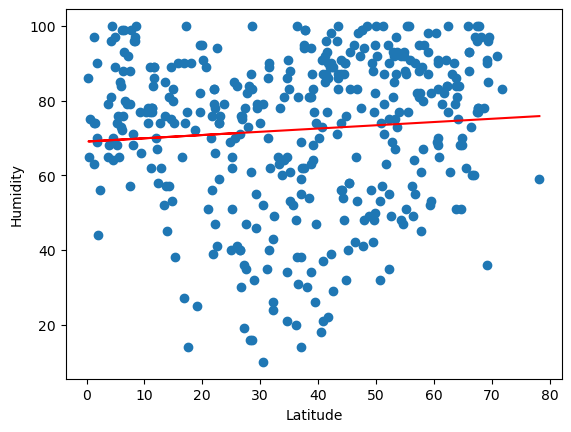

In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

plt.ylabel("Humidity")
linear_regress_plot(x, y)


The r-value is: 0.08162205799624332


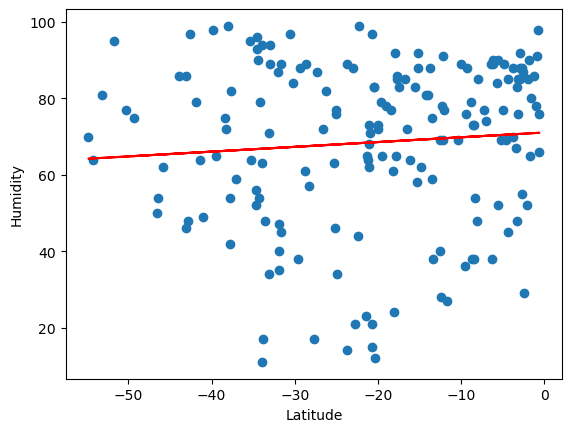

In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

plt.ylabel("Humidity")
linear_regress_plot(x, y)


**Discussion about the linear relationship:** In both the northern and southern hemispheres, the Pearson correlation coefficent is close to 0; This indicates a weak positive relationship in both the northern and southern hemispheres. In other words, there is little to no linear association between the latitude and humidity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05547526616776345


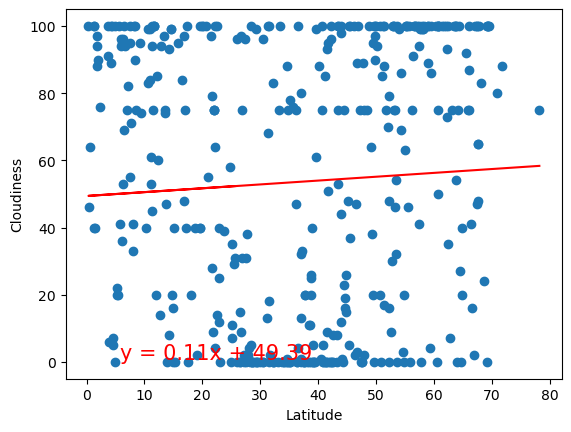

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

plt.ylabel("Cloudiness")
linear_regress_plot(x, y)

The r-value is: 0.14386822136635977


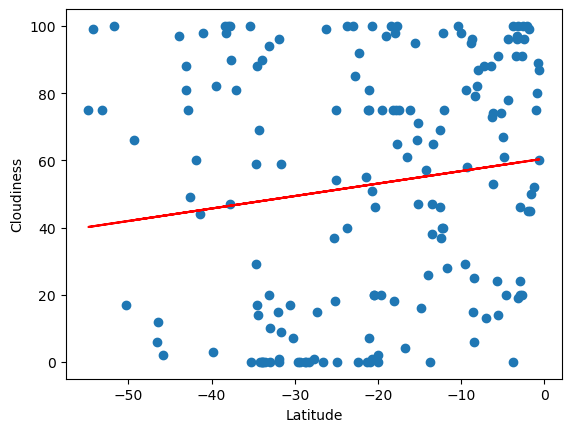

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

plt.ylabel("Cloudiness")
linear_regress_plot(x, y)


**Discussion about the linear relationship:** In both the northern and southern hemispheres, the Pearson correlation coefficent is close to 0; This indicates a weak positive relationship in both the northern and southern hemispheres. In other words, there is little to no linear association between the latitude and cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11320898122385274


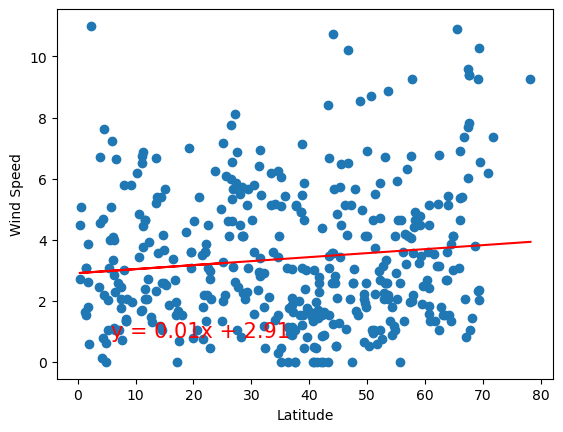

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

plt.ylabel("Wind Speed")
linear_regress_plot(x, y)

The r-value is: -0.15636027846610395


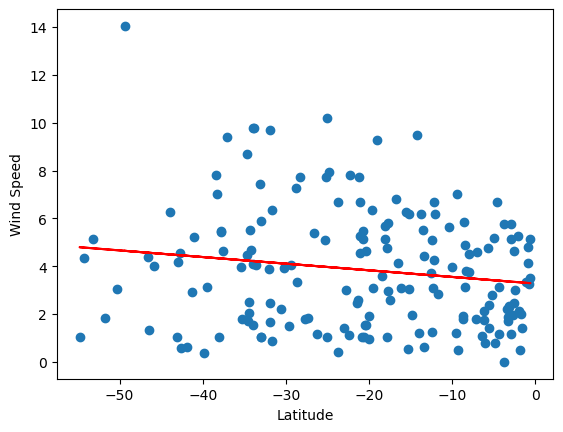

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

plt.ylabel("Wind Speed")
linear_regress_plot(x, y)

**Discussion about the linear relationship:** In both the northern and southern hemispheres, the Pearson correlation coefficent is close to 0; This indicates a weak positive relationship in the northern hemisphere and a weak negative relationship in the southern hemisphere. In other words, there is little to no linear association between the latitude and wind speed in either hemisphere.